#Cleaned script below

In [ ]:
import pandas as pd
import numpy as np
import random
from wordcloud import WordCloud
from PIL import Image
import PIL.ImageOps
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
import re

In [ ]:
stopword_list = nltk.corpus.stopwords.words('english')

In [ ]:
import nltk
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword_list = nltk.corpus.stopwords.words('english')

In [ ]:
### helper functions
def clean_text(text):
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text) # Remove URLs
  text = re.sub('@[^\s]+', '', text) # Remove usernames
  text = re.sub(r'#([^\s]+)', r'\1', text) # Remove the # in #hashtag
  text = re.sub(r'[^A-Za-z]+', ' ', text) # Remove special characters and numbers
  text = re.sub(r'rt|fb|nflx|goog|googl|axp|aapl', '', text, flags = re.I) # Remove tickers
  text = re.sub(r'\b[a-zA-Z]\b', '', text) # Remove "single-worders"
  text = re.sub(r' [ ]+', ' ', text) # Remove extra whitespaces
  text = text.lower() # Convert text to lower-case
  return text

def tokenize_and_stopwords(line):
  tokens = nltk.word_tokenize(line)   
  tokens = [token.strip() for token in tokens]
  tokens = [token for token in tokens if token not in cut_words]
  ' '.join([token for token in tokens if token not in stopword_list])
  return tokens

In [ ]:
##define dataset
xbox = pd.read_excel('/content/drive/My Drive/proyecto_final/data/stream_01082409_xbox.xlsx')

play = pd.read_excel('/content/drive/My Drive/proyecto_final/data/stream_01082409_ps.xlsx')

###Color functions

In [ ]:
##green xbox color defined
def green_color_func(word, font_size, position, orientation, random_state=None,
                  **kwargs):
  # return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
  return "hsl(100, 100%, 50%)"


##define playstation color
def blue_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    # return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
    return "hsl(216, 100%, 50%)"

##Fuction

Generating word cloud....
Making plot


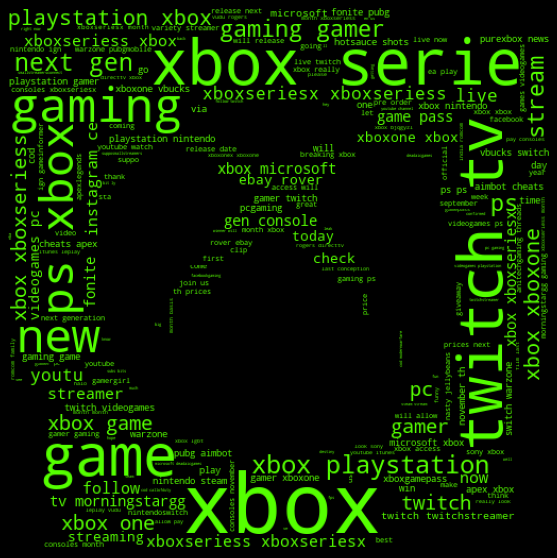

In [ ]:
###xbox (color 1) or playstation(color2)


def create_wordcloud(df, color, date):

  """ genera un wordcloud png con tweets de las fechas establecidas
    
    Parameters
    ----------
    df: dataframe
        dataframe con los tuits a graficar
    color: int
        opciones de color (1:xbox, 2:playstation)
    date: int
        opciones de fecha (1, 2, 3)
        
    Returns
    -------
    None, generación de archivo png en el local
    """

  ## clean date column
  df.rename(columns={"Published Date (GMT+02:00) Windhoek": 'Publish_DateTime'}, inplace=True)
  df['Publish_DateTime'] = pd.to_datetime(df['Publish_DateTime'], infer_datetime_format=True)

  first = (df['Publish_DateTime'] >= '2020-09-7') & (df['Publish_DateTime'] <= '2020-09-11')
  sec = (df['Publish_DateTime'] >= '2020-09-14') & (df['Publish_DateTime'] <= '2020-09-18') 
  third = (df['Publish_DateTime'] >= '2020-09-19') & (df['Publish_DateTime'] <= '2020-09-23')  

  one = df[first]
  two = df[sec]
  three = df[third]


  date_1 = one[['Post ID','Sound Bite Text']]
  date_2 = two[['Post ID','Sound Bite Text']]
  date_3 = three[['Post ID','Sound Bite Text']]

  ##default for date param
  used_df = date_1

  if (date == 1):
    used_df = date_1
  elif (date == 2):
    used_df = date_2
  else:
    used_df = date_3

  used_df['cleaned_text'] = used_df['Sound Bite Text'].apply(clean_text)

  nltk.download("punkt")
  nltk.download('stopwords')
  stopword_list = nltk.corpus.stopwords.words('english')

  cut_words = ['pic', 'twitter', 'deleted', 'author', 'post']
  df['tokenize_text'] = df['cleaned_text'].apply(tokenize_and_stopwords)


  ### png logo defined
  if (color == 1):
    char_mask = np.array(Image.open("/content/drive/My Drive/proyecto_final/code/Dan_code/xb.png"))
  else:
    char_mask = np.array(Image.open("/content/drive/My Drive/proyecto_final/code/Dan_code/play.png"))
  
  image_colors = ImageColorGenerator(char_mask)

  # generate wordcloud
  print('Generating word cloud....')
  wc = WordCloud(background_color="white", max_words=200, width=400, height=400, #contour_width=3, contour_color='white',
  mask=char_mask, random_state=1).generate(' '.join(used_df['tokenize_text'].apply(' '.join)))

  print('Making plot')
  plt.figure(figsize=(20,10))
  ypos = 800

  # plt.style.use('dark_background')
  name = ''
  if (color == 1):
    plt.imshow(wc.recolor(color_func=green_color_func))
    name = 'xbox'
  else:
    plt.imshow(wc.recolor(color_func=blue_color_func))
    name = 'playstation'

  # use image colours with white background
  #plt.imshow(wc.recolor(color_func=image_colors))

  plt.axis("off")
  plt.savefig('wordcloud_'+name+'_black_bkg.png', dpi=200)

#Tweet clustering

##Generate cluster labels

In [ ]:
stopword_list

In [ ]:
##define dataset
xbox = pd.read_excel('/content/drive/My Drive/proyecto_final/data/stream_01082409_xbox.xlsx')

play = pd.read_excel('/content/drive/My Drive/proyecto_final/data/stream_01082409_ps.xlsx')

In [ ]:
xbox.rename(columns={"Published Date (GMT+02:00) Windhoek": 'Publish_DateTime'}, inplace=True)
xbox['Publish_DateTime'] = pd.to_datetime(xbox['Publish_DateTime'], infer_datetime_format=True)

play.rename(columns={"Published Date (GMT+02:00) Windhoek": 'Publish_DateTime'}, inplace=True)
play['Publish_DateTime'] = pd.to_datetime(play['Publish_DateTime'], infer_datetime_format=True)

In [ ]:
xbox['Sentiment'].value_counts()

Neutrals     8763
Positives    5932
Negatives    1580
Mixed        1115
Name: Sentiment, dtype: int64

In [ ]:
clust_xbox = xbox[['Post ID','Sound Bite Text','Sentiment','Publish_DateTime']]
clust_play = play[['Post ID','Sound Bite Text','Sentiment','Publish_DateTime']]
clust_xbox = clust_xbox[:-8]
clust_play = clust_play[:-8]

In [ ]:
clust_xbox.shape

(20000, 4)

In [ ]:
clust_xbox.dropna(inplace=True)

In [ ]:
clust_xbox.shape

(17390, 3)

In [ ]:
clust_xbox['Sound Bite Text'].loc[0]

'RT @NieRGame: #NieR Replicant ver.1.22474487139… is coming to #PS4, #Xbox One and #Steam on April 23, 2021. Watch the brand-new #TGS2020 trailer now and prepare to experience the NieR Replicant story for the first time in the west: sqex.link/gl35 pic.twitter.com/FGO2dOfWfJ'

In [ ]:
clust_xbox['cleaned_text'] = clust_xbox['Sound Bite Text'].apply(clean_text)
clust_play['cleaned_text'] = clust_play['Sound Bite Text'].apply(clean_text)

In [ ]:
cut_words = ['pic', 'twitter', 'deleted', 'author', 'post']

clust_xbox['tokenize_text'] = clust_xbox['cleaned_text'].apply(tokenize_and_stopwords)
clust_play['tokenize_text'] = clust_play['cleaned_text'].apply(tokenize_and_stopwords)

In [ ]:
from collections import Counter

In [ ]:
cut_words = ['pic', 'twitter', 'deleted', 'author', 'post'] 
BOW = []

for texto in clust_xbox["cleaned_text"]:
  tokens=nltk.word_tokenize(texto)
  tokens = [token for token in tokens if token not in cut_words]
  BOW.append(Counter(tokens))

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# codificador_entrada = DictVectorizer()
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

# X = codificador_entrada.fit_transform(BOW)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(clust_xbox["cleaned_text"])

In [ ]:
print(tfidf_vectorizer_vectors)

In [ ]:
# D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1, 'bar':8}]
# X = codificador_entrada.fit_transform(D)

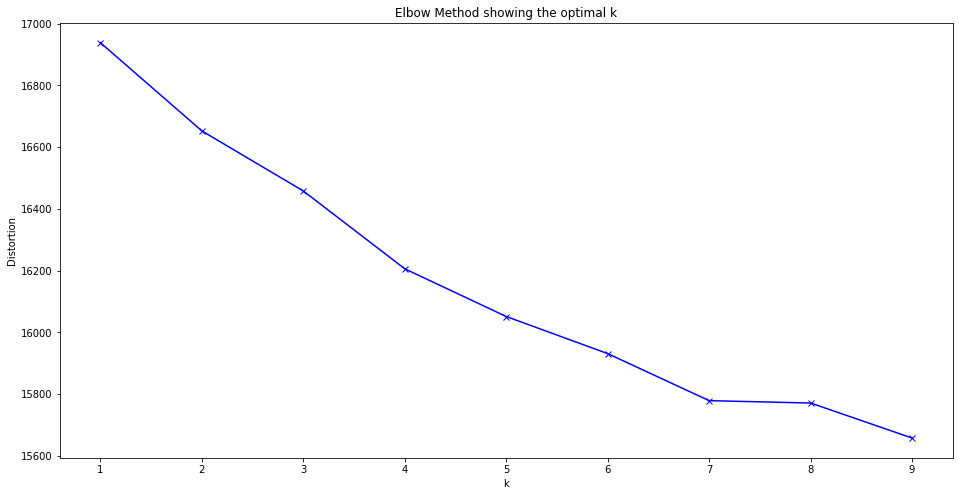

In [ ]:
from sklearn.cluster import KMeans
# from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tfidf_vectorizer_vectors)
    distortions.append(kmeanModel.inertia_)

fig = plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method showing the optimal k')
plt.show()
fig.savefig('elbox_xbox_tweets.png', dpi=fig.dpi, bbox_inches='tight')

In [ ]:
def stratified_sample_df(df, col, n_samples):
    n = min(n_samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n))
    df_.index = df_.index.droplevel(0)
    return df_

In [ ]:
new = stratified_sample_df(clust_xbox, 'cluster_label', 4000)

tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(new["cleaned_text"])

In [ ]:
##Selección utilizando 7 clusters
from sklearn.cluster import KMeans
kmeanModel = KMeans(n_clusters=7, random_state=1)
# kmeanModel.fit(tfidf_vectorizer_vectors)

In [ ]:
labels = kmeanModel.fit_predict(tfidf_vectorizer_vectors)

In [ ]:
wordvector_fit_2d = tfidf_vectorizer_vectors.todense()
pca = PCA(n_components=2).fit(wordvector_fit_2d)
datapoint = pca.transform(wordvector_fit_2d)

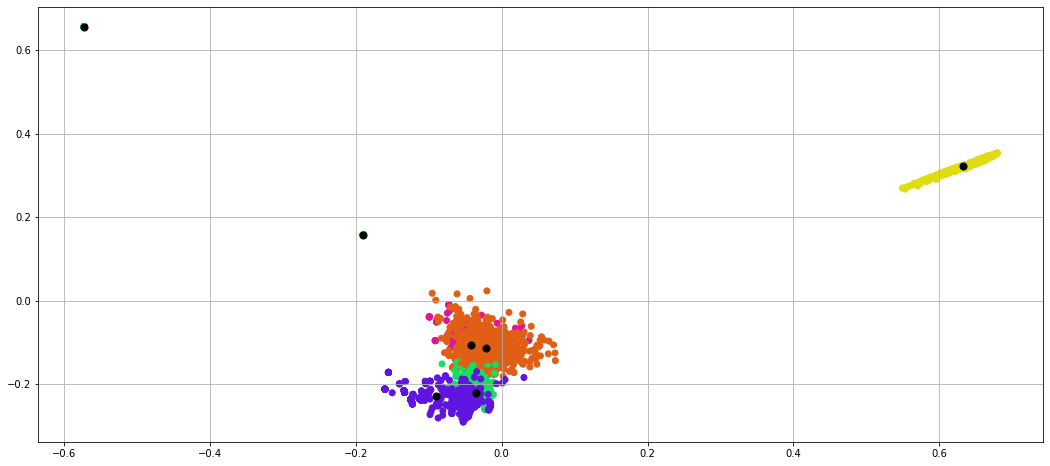

In [ ]:
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0", '#5f14e0', '#14e05f', '#e01495']##Agregar más colores
color = [label[i] for i in labels]
fig =plt.figure(figsize=(18,8))
plt.grid()
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeanModel.cluster_centers_
centroidpoint = pca.transform(centroids)

plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='o', s=50, c='#000000')
plt.show()
fig.savefig('pca_clusters_xbox.png', dpi=fig.dpi, bbox_inches='tight')

In [149]:
clust_xbox['cluster_label'].value_counts(normalize=True)

5    0.647786
2    0.191489
0    0.054744
4    0.029902
3    0.025762
6    0.025474
1    0.024842
Name: cluster_label, dtype: float64

In [150]:
clust_xbox.columns

Index(['Post ID', 'Sound Bite Text', 'Sentiment', 'Publish_DateTime',
       'cleaned_text', 'tokenize_text', 'cluster_label'],
      dtype='object')

In [158]:
other = clust_xbox[~clust_xbox['Sentiment'].isin(['Mixed', 'Neutrals'])]  # .groupby(['cluster_label', 'Sentiment']).reset_index(name='count')  # .value_counts(normalize=True)

for x in [0, 1, 2, 3, 4, 5, 6]:
  a = other[other['cluster_label']==x]
  print('Cluster: ')
  print(x)
  print(a['Sentiment'].value_counts(normalize=True))

Cluster: 
0
Positives    0.982143
Negatives    0.017857
Name: Sentiment, dtype: float64
Cluster: 
1
Positives    1.0
Name: Sentiment, dtype: float64
Cluster: 
2
Positives    0.73628
Negatives    0.26372
Name: Sentiment, dtype: float64
Cluster: 
3
Positives    0.933884
Negatives    0.066116
Name: Sentiment, dtype: float64
Cluster: 
4
Positives    1.0
Name: Sentiment, dtype: float64
Cluster: 
5
Positives    0.766831
Negatives    0.233169
Name: Sentiment, dtype: float64
Cluster: 
6
Positives    0.556701
Negatives    0.443299
Name: Sentiment, dtype: float64


In [ ]:
clust_xbox['cluster_label'] = kmeanModel.labels_

In [ ]:
clust_xbox.to_csv('xbox_clusters.csv', encoding='utf-8-sig')

In [ ]:
clust_xbox = pd.read_csv('/content/drive/My Drive/proyecto_final/data/xbox_clusters.csv', encoding='utf-8-sig')
del clust_xbox['Unnamed: 0']

In [ ]:
clust_xbox.head()

,Post ID,Sound Bite Text,Sentiment,Publish_DateTime,cleaned_text,tokenize_text,cluster_label
0,1309192077763211264,RT @NieRGame: #NieR Replicant ver.1.2247448713...,Positives,2020-09-24 20:04:49,nier replicant ver is coming to ps xbox one a...,"['nier', 'replicant', 'ver', 'is', 'coming', '...",4
1,1309190869380194304,Active in the last hour: 1.) Halo 2 on #Xbox (...,Neutrals,2020-09-24 20:00:01,active in the last hour halo on xbox players g...,"['active', 'in', 'the', 'last', 'hour', 'halo'...",5
2,1309192125582458880,RT @NieRGame: #NieR Replicant ver.1.2247448713...,Positives,2020-09-24 20:05:01,nier replicant ver is coming to ps xbox one a...,"['nier', 'replicant', 'ver', 'is', 'coming', '...",4
3,1309193273118920706,Im Live! Ya'll! Come join us on Twitch twitch....,Neutrals,2020-09-24 20:09:34,im live ya ll come join us on twitch twitch tv...,"['im', 'live', 'ya', 'll', 'come', 'join', 'us...",2
4,1309193833465311232,RT @NieRGame: #NieR Replicant ver.1.2247448713...,Positives,2020-09-24 20:11:48,nier replicant ver is coming to ps xbox one a...,"['nier', 'replicant', 'ver', 'is', 'coming', '...",4


In [ ]:
clust_xbox[clust_xbox['cluster_label'] == 0]

,Post ID,Sound Bite Text,Sentiment,Publish_DateTime,cleaned_text,tokenize_text,cluster_label
33,1291757558936600577,RT @princeorama: Like this tweet for #avengers...,Neutrals,2020-08-07 16:26:16,like this tweet for avengers beta avengersbet...,"['like', 'this', 'tweet', 'for', 'avengers', '...",0
35,1298970886490349569,I just entered a giveaway for a $20 gift card ...,Positives,2020-08-27 14:09:27,just entered giveaway for gift card by follow...,"['just', 'entered', 'giveaway', 'for', 'gift',...",0
42,1303395924165701636,RT @II_Of_Seven: Might as well do another swee...,Positives,2020-09-08 20:12:58,might as well do another sweet giveaway with ...,"['might', 'as', 'well', 'do', 'another', 'swee...",0
46,1301616501183709185,RT @FutCoinPlaza: ??FIFA 21 ULTIMATE GIVEAWAY?...,Positives,2020-09-03 21:22:11,fifa ultimate giveaway to enter follow like r...,"['fifa', 'ultimate', 'giveaway', 'to', 'enter'...",0
52,1293660705523142656,RT @Diztructor: ?? #Giveaway Alert ?? I've got...,Positives,2020-08-12 22:28:41,giveaway ale ve got another code for roguecom...,"['giveaway', 'ale', 've', 'got', 'another', 'c...",0
...,...,...,...,...,...,...,...
17294,1307078290281304064,RT @SmallywoodXA: Want to win Want to win Mars...,Neutrals,2020-09-19 00:05:23,want to win want to win mars power industries...,"['want', 'to', 'win', 'want', 'to', 'win', 'ma...",0
17302,1307062150217768965,RT @AchievementLand: RT & Follow for a chance ...,Neutrals,2020-09-18 23:01:15,follow for chance to win harvest moon light o...,"['follow', 'for', 'chance', 'to', 'win', 'harv...",0
17305,1295150017725038594,RT @SmallywoodXA: Want to win Ultimate Fishing...,Neutrals,2020-08-17 01:06:41,want to win ultimate fishing simulator for xb...,"['want', 'to', 'win', 'ultimate', 'fishing', '...",0
17334,1308479443283959808,Do you want a win free $10 Gift Card? Check ou...,Neutrals,2020-09-22 20:53:04,do you want win free gift card check out playr...,"['do', 'you', 'want', 'win', 'free', 'gift', '...",0


In [ ]:
def mas_informativas_para_clase(codificador, clasificador, clase, binario=True, n=10):
    clase_id = list(clasificador.classes_).index(clase)  # se obtiene el índice de la clase que se quiere analizar
    caracteristicas = codificador.get_feature_names()  # la función maneja los nombres originales de las características
    mejores = sorted(zip(clasificador.coef_[clase_id], caracteristicas))[-n:] # Se ordenan, solo queremos las mejores N
    if binario:
      peores = sorted(zip(clasificador.coef_[clase_id], caracteristicas))[:n] # Se ordenan, solo queremos las peores N
      for coeficiente, caracteristica in peores:
        print(1, caracteristica, coeficiente)
      print() 
    for coeficiente, caracteristica in mejores:
        print(clase, caracteristica, coeficiente)

##Try-run in topic modeling

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import LatentDirichletAllocation

import gensim
from gensim import corpora
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string


In [ ]:
# !pip install pyldavis

     |████████████████████████████████| 1.6MB 2.6MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=4a2caf7246f01a2b42090dc00219d130e1bbcaa92280d368a5fb857bf0996777
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [ ]:
clust_xbox = pd.read_csv('/content/drive/My Drive/proyecto_final/data/xbox_clusters.csv', encoding='utf-8-sig')

In [ ]:
clust_xbox.head()

,Unnamed: 0,Post ID,Sound Bite Text,Sentiment,Publish_DateTime,cleaned_text,tokenize_text,cluster_label
0,0,1309192077763211264,RT @NieRGame: #NieR Replicant ver.1.2247448713...,Positives,2020-09-24 20:04:49,nier replicant ver is coming to ps xbox one a...,"['nier', 'replicant', 'ver', 'is', 'coming', '...",4
1,1,1309190869380194304,Active in the last hour: 1.) Halo 2 on #Xbox (...,Neutrals,2020-09-24 20:00:01,active in the last hour halo on xbox players g...,"['active', 'in', 'the', 'last', 'hour', 'halo'...",5
2,3,1309192125582458880,RT @NieRGame: #NieR Replicant ver.1.2247448713...,Positives,2020-09-24 20:05:01,nier replicant ver is coming to ps xbox one a...,"['nier', 'replicant', 'ver', 'is', 'coming', '...",4
3,4,1309193273118920706,Im Live! Ya'll! Come join us on Twitch twitch....,Neutrals,2020-09-24 20:09:34,im live ya ll come join us on twitch twitch tv...,"['im', 'live', 'ya', 'll', 'come', 'join', 'us...",2
4,5,1309193833465311232,RT @NieRGame: #NieR Replicant ver.1.2247448713...,Positives,2020-09-24 20:11:48,nier replicant ver is coming to ps xbox one a...,"['nier', 'replicant', 'ver', 'is', 'coming', '...",4


In [ ]:
def lematizer(text):
    stop = set(stopwords.words('english'))
    stop.update(('pic', 'twitter', 'deleted', 'author', 'post'))
    exclude = set(string.punctuation) 
    lemma = WordNetLemmatizer()
    
    text=text.rstrip()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    
    return normalized

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
text_clean=[]
for text in clust_xbox['cleaned_text']:
    text_clean.append(lematizer(text).split())

In [ ]:
# text_clean

In [ ]:
dictionary = corpora.Dictionary(text_clean)
corpus = [dictionary.doc2bow(text) for text in text_clean]

In [ ]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus, num_topics=7, id2word = dictionary, passes=4)

In [ ]:
print(ldamodel.print_topics(num_topics=7, num_words=25))

[(0, '0.089*"xbox" + 0.050*"com" + 0.024*"xboxseriesx" + 0.020*"p" + 0.016*"game" + 0.015*"series" + 0.011*"microsoft" + 0.011*"xboxseriess" + 0.011*"new" + 0.011*"one" + 0.010*"news" + 0.009*"playstation" + 0.009*"time" + 0.008*"nier" + 0.008*"next" + 0.008*"console" + 0.008*"replicant" + 0.006*"first" + 0.006*"coming" + 0.006*"steam" + 0.006*"gaming" + 0.006*"watch" + 0.005*"trailer" + 0.005*"gen" + 0.005*"story"'), (1, '0.055*"xbox" + 0.033*"twitch" + 0.024*"com" + 0.016*"gaming" + 0.015*"tv" + 0.013*"game" + 0.012*"live" + 0.012*"p" + 0.009*"win" + 0.009*"twitchstreamer" + 0.009*"giveaway" + 0.009*"xboxone" + 0.008*"streamer" + 0.008*"gamer" + 0.008*"come" + 0.008*"follow" + 0.008*"stream" + 0.006*"playstation" + 0.006*"pc" + 0.005*"twitchtv" + 0.005*"supposmallstreamers" + 0.005*"youtube" + 0.004*"streaming" + 0.004*"like" + 0.004*"check"'), (2, '0.036*"xbox" + 0.036*"com" + 0.028*"p" + 0.027*"gaming" + 0.024*"game" + 0.022*"twitch" + 0.022*"gamer" + 0.021*"callofduty" + 0.018*"wa

##Topic Visualization

In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis_data)

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
texts = [tokenizer.tokenize(document.text.lower()) for document in articles]
textos = []
for text in texts:
    texto = []
    for word in text:
      if word not in stopwords:
        texto.append(word)
    textos.append(texto)
dictionary = corpora.Dictionary(textos)
corpus = [dictionary.doc2bow(text) for text in textos]
#texts = [item for sublist in texts for item in sublist]
#dictionary.token2id
nb_passes = 4
nb_topics = 4
lda_model = gensim.models.LdaModel(corpus = corpus,\
                                   num_topics = nb_topics,\
                                   id2word = dictionary,\
                                   passes = nb_passes)


In [ ]:
xbox_corpus = ' '.join(clust_xbox['tokenize_text'].apply(' '.join))
play_corpus = ' '.join(clust_play['tokenize_text'].apply(' '.join))

In [ ]:
xbox_corpus

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
tokens = nltk.word_tokenize(xbox_corpus)
tokens = [i for i in tokens if i.isalpha() and i not in stopword_list]

In [ ]:
wordfreq_x = {}
tokens = nltk.word_tokenize(xbox_corpus)
tokens = [i for i in tokens if i.isalpha() and i not in stopword_list]
for token in tokens:
    if token not in wordfreq_x.keys():
        wordfreq_x[token] = 1
    else:
        wordfreq_x[token] += 1

wordfreq_p = {}
tokens = nltk.word_tokenize(play_corpus)
tokens = [i for i in tokens if i.isalpha() and i not in stopword_list]
for token in tokens:
    if token not in wordfreq_p.keys():
        wordfreq_p[token] = 1
    else:
        wordfreq_p[token] += 1

In [ ]:
len(wordfreq_p)

22012

In [ ]:
import heapq

most_freq_x = heapq.nlargest(2000, wordfreq_x, key=wordfreq_x.get)
most_freq_p = heapq.nlargest(2000, wordfreq_p, key=wordfreq_p.get)

print(most_freq_x)
print(most_freq_p)

['xbox', 'com', 'twitch', 'ps', 'gaming', 'playstation', 'gamer', 'xboxone', 'tv', 'game', 'games', 'pc', 'videogames', 'one', 'xboxseriesx', 'live', 'new', 'youtube', 'fonite', 'warzone', 'streamer', 'follow', 'nintendo', 'series', 'stream', 'callofduty', 'microsoft', 'like', 'get', 'giveaway', 'twitchstreamer', 'streaming', 'gamers', 'steam', 'cod', 'free', 'come', 'pcgaming', 'ebay', 'time', 'rover', 'win', 'instagram', 'xboxseriess', 'youtu', 'pubg', 'apex', 'play', 'switch', 'playing', 'coming', 'news', 'watch', 'modernwarfare', 'halo', 'us', 'twitchtv', 'console', 'nintendoswitch', 'next', 'twitchaffiliate', 'good', 'check', 'video', 'join', 'gamergirl', 'fun', 'brand', 'retweet', 'memes', 'link', 'bethesda', 'first', 'supposmallstreamers', 'morningstargg', 'gamingcommunity', 'november', 'best', 'love', 'callofdutymodernwarfare', 'going', 'today', 'see', 'vbucks', 'go', 'cheats', 'apexlegends', 'th', 'community', 'want', 'ly', 'pubgmobile', 'many', 'gta', 'enter', 'let', 'aimbot'

In [ ]:
xbox_frec = list(wordfreq_x.keys())
play_frec = list(wordfreq_p.keys()) 

In [ ]:
sentence_vectors_x = []
for sentence in clust_xbox['cleaned_text']:
    sentence_tokens = nltk.word_tokenize(sentence)
    sentence_tokens = [i for i in sentence_tokens if i.isalpha() and i not in stopword_list]
    sent_vec = []
    for token in xbox_frec:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors_x.append(sent_vec)


sentence_vectors_p = []
for sentence in clust_play['cleaned_text']:
    sentence_tokens = nltk.word_tokenize(sentence)
    sentence_tokens = [i for i in sentence_tokens if i.isalpha() and i not in stopword_list]
    sent_vec = []
    for token in play_frec:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors_p.append(sent_vec)

In [ ]:
sentence_vectors_x = np.asarray(sentence_vectors_x)
sentence_vectors_p = np.asarray(sentence_vectors_p)

In [ ]:
BOW_x = pd.DataFrame(sentence_vectors_x, columns=xbox_frec, index=index)
BOW_p = pd.DataFrame(sentence_vectors_p, columns=play_frec, index=index)


In [ ]:
# BOW_play = []

# for texto in clust_play['cleaned_text']:
#   tokens=nltk.word_tokenize(texto)  
#   tokens = [token.strip() for token in tokens]
#   tokens = [token for token in tokens if token not in cut_words]
#   tokens = [i for i in tokens if i.isalpha() and i not in stopword_list]
#   BOW_play.append(Counter(tokens))

In [ ]:
len(BOW_play)

13433

In [ ]:
clust_xbox['tokenize_text']

0        [nier, replicant, ver, is, coming, to, ps, xbo...
1        [active, in, the, last, hour, halo, on, xbox, ...
2                                                [by, the]
3        [nier, replicant, ver, is, coming, to, ps, xbo...
4        [im, live, ya, ll, come, join, us, on, twitch,...
                               ...                        
19995    [warzone, duos, tournament, all, regions, priz...
19996    [played, hours, of, immoals, fenyx, rising, lo...
19997    [follow, youtube, rainbowsixsiege, siege, meme...
19998                                            [by, the]
19999    [finally, got, to, shd, on, now, hardcore, cha...
Name: tokenize_text, Length: 20000, dtype: object

##Date grouping

In [ ]:
clust_xbox = pd.read_csv('/content/drive/My Drive/proyecto_final/data/xbox_clusters.csv', encoding='utf-8-sig')
del clust_xbox['Unnamed: 0']
clust_xbox['Publish_DateTime'] = pd.to_datetime(clust_xbox['Publish_DateTime'], infer_datetime_format=True)

In [ ]:
clust_xbox.head()

,Post ID,Sound Bite Text,Sentiment,Publish_DateTime,cleaned_text,tokenize_text,cluster_label
0,1309192077763211264,RT @NieRGame: #NieR Replicant ver.1.2247448713...,Positives,2020-09-24 20:04:49,nier replicant ver is coming to ps xbox one a...,"['nier', 'replicant', 'ver', 'is', 'coming', '...",4
1,1309190869380194304,Active in the last hour: 1.) Halo 2 on #Xbox (...,Neutrals,2020-09-24 20:00:01,active in the last hour halo on xbox players g...,"['active', 'in', 'the', 'last', 'hour', 'halo'...",5
2,1309192125582458880,RT @NieRGame: #NieR Replicant ver.1.2247448713...,Positives,2020-09-24 20:05:01,nier replicant ver is coming to ps xbox one a...,"['nier', 'replicant', 'ver', 'is', 'coming', '...",4
3,1309193273118920706,Im Live! Ya'll! Come join us on Twitch twitch....,Neutrals,2020-09-24 20:09:34,im live ya ll come join us on twitch twitch tv...,"['im', 'live', 'ya', 'll', 'come', 'join', 'us...",2
4,1309193833465311232,RT @NieRGame: #NieR Replicant ver.1.2247448713...,Positives,2020-09-24 20:11:48,nier replicant ver is coming to ps xbox one a...,"['nier', 'replicant', 'ver', 'is', 'coming', '...",4


In [ ]:
type(clust_xbox['Publish_DateTime'].loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
clust_xbox[(clust_xbox['Publish_DateTime'] >= '2020-09-7') & (clust_xbox['Publish_DateTime'] <= '2020-09-11')]

,Post ID,Sound Bite Text,Sentiment,Publish_DateTime,cleaned_text,tokenize_text,cluster_label
12,1303394424723066881,@StupidGamerNow @tools_by_ezio @rtsmallstreams...,Positives,2020-09-08 20:07:01,thanks we should be live soon hope to see you...,"['thanks', 'we', 'should', 'be', 'live', 'soon...",2
13,1303864203942473728,xboxaimbot.com is the only website to get free...,Mixed,2020-09-10 03:13:45,xboxaimbot com is the only website to get free...,"['xboxaimbot', 'com', 'is', 'the', 'only', 'we...",1
14,1303862642419724288,Next gen always or in the past starts with the...,Positives,2020-09-10 03:07:33,next gen always or in the past stas with the n...,"['next', 'gen', 'always', 'or', 'in', 'the', '...",5
22,1303864322649501696,RT @Dealer_Gaming: Cool fact about Xbox Series...,Mixed,2020-09-10 03:14:13,cool fact about xbox series code name spec xb...,"['cool', 'fact', 'about', 'xbox', 'series', 'c...",5
23,1303372682713542656,RT @aminetheman9: That Xbox S really look like...,Neutrals,2020-09-08 18:40:37,that xbox really look like this sony xbox pic...,"['that', 'xbox', 'really', 'look', 'like', 'th...",5
...,...,...,...,...,...,...,...
17160,1303019378842062849,BARK BARK BARK! It's time for Farrstrider Play...,Positives,2020-09-07 19:16:43,bark bark bark it time for farrstrider playz j...,"['bark', 'bark', 'bark', 'it', 'time', 'for', ...",5
17170,1303005785958408203,#Film THE LAST CONCEPTION ??Staring #NazaninMi...,Positives,2020-09-07 18:22:42,film the last conception staring nazaninmindi ...,"['film', 'the', 'last', 'conception', 'staring...",5
17172,1303024984135274496,RT @MorningStarGG: #HotSauce #shots for subs W...,Positives,2020-09-07 19:38:59,hotsauce shots for subs we re playing paladin...,"['hotsauce', 'shots', 'for', 'subs', 'we', 're...",6
17210,1303015180788477952,Follow Fark's journey now in the third dimensi...,Neutrals,2020-09-07 19:00:02,follow fark journey now in the third dimension...,"['follow', 'fark', 'journey', 'now', 'in', 'th...",5


In [ ]:

first = (clust_xbox['Publish_DateTime'] >= '2020-09-7') & (clust_xbox['Publish_DateTime'] <= '2020-09-11')
sec = (clust_xbox['Publish_DateTime'] >= '2020-09-14') & (clust_xbox['Publish_DateTime'] <= '2020-09-18') 
third = (clust_xbox['Publish_DateTime'] >= '2020-09-19') & (clust_xbox['Publish_DateTime'] <= '2020-09-23')  

one = clust_xbox[first]
two = clust_xbox[sec]
three = clust_xbox[third]


# date_1 = one[['Post ID','Sound Bite Text']]
# date_2 = two[['Post ID','Sound Bite Text']]
# date_3 = three[['Post ID','Sound Bite Text']]


In [ ]:
one['tokenize_text'].loc[14]

"['next', 'gen', 'always', 'or', 'in', 'the', 'past', 'stas', 'with', 'the', 'next', 'gen', 'game', 'that', 'blows', 'you', 'away', 'the', 'way', 'it', 'looks', 'and', 'plays', 'don', 'see', 'reason', 'to', 'buy', 'an', 'maybe', 'for', 'that', 'sweet', 'cyberpunk', 'unless', 'you', 'pc', 'and', 'getting', 'upgrade', 'instead', 'xbox', 'playstation']"

In [ ]:
one[~one['Sentiment'].isin(['Mixed', 'Neutrals'])].groupby(['Sentiment', 'cluster_label'])['Post ID'].count().sort_index(ascending=False)

Sentiment  cluster_label
Positives  6                 14
           5                395
           4                  1
           3                  9
           2                109
           1                 18
           0                 20
Negatives  6                 20
           5                 79
           3                  1
           2                 32
Name: Post ID, dtype: int64

In [ ]:
three[~three['Sentiment'].isin(['Mixed', 'Neutrals'])].groupby(['Sentiment'])['Post ID'].count().sort_index(ascending=False)

Sentiment
Positives    621
Negatives    236
Name: Post ID, dtype: int64

In [ ]:
30/236*100

12.711864406779661

In [ ]:
two[~two['Sentiment'].isin(['Mixed', 'Neutrals'])].groupby(['Sentiment', 'cluster_label'])['Post ID'].count().sort_index(ascending=False)

Sentiment  cluster_label
Positives  6                  4
           5                361
           3                 12
           2                 72
           1                 26
           0                 13
Negatives  6                 44
           5                 81
           2                 12
Name: Post ID, dtype: int64

In [ ]:
three[~three['Sentiment'].isin(['Mixed', 'Neutrals'])].groupby(['Sentiment', 'cluster_label'])['Post ID'].count().sort_index(ascending=False)

Sentiment  cluster_label
Positives  6                  7
           5                458
           3                 16
           2                 70
           1                 26
           0                 44
Negatives  6                 30
           5                183
           2                 22
           0                  1
Name: Post ID, dtype: int64

In [ ]:
one[one['Sentiment']=='Positives']

In [ ]:
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [ ]:
import heapq
most_freq = heapq.nlargest(10, wordfreq, key=wordfreq.get)

In [ ]:
' '.join(one['cleaned_text']) #.apply(' '.join)
# one['cleaned_text'].apply(' '.join)

' thanks we should be live soon hope to see you there in the asylum of the allstars welcome gaming gamer twitch videogames pc xbox playstation nintendo steam streaming xboxaimbot com is the only website to get free hax fonite pubg aimbot cheats apex xbox playstation gamer xboxone vbucks switch warzone pubgmobile next gen always or in the past stas with the next gen game that blows you away the way it looks and plays don see reason to buy an maybe for that sweet cyberpunk unless you pc and getting upgrade instead xbox playstation  cool fact about xbox series code name spec xbox series has tf gpu that is better than tf gcn gpu today thanks to rdna it also has cpu that is indeed faster than ps cpu say what you will but that has to annoy sony at least little bit xbox ps   that xbox really look like this sony xbox pic twitter com bjqgyzl   cool fact about xbox series code name spec xbox series has tf gpu that is better than tf gcn gpu today thanks to rdna it also has cpu that is indeed fast

In [ ]:
import heapq

stop = set(stopwords.words('english'))
stop.update(('pic', 'twitter', 'deleted', 'author', 'post', 'xboxseriess','xboxseriesx', 'xbox', 'com'))

def get_10freq_words(df):
  sent = ['Positives','Negatives']
  for sentim in sent:
    tokens = df[df['Sentiment']==sentim]
    corpus = ' '.join(tokens['cleaned_text'])
    # print(corpus)
    tokens = nltk.word_tokenize(corpus)
    tokens = [token for token in tokens if token not in stop]
    wordfreq = {}
    for token in tokens:
      if token not in wordfreq.keys():
        wordfreq[token] = 1
      else:
        wordfreq[token] += 1
    most_freq = heapq.nlargest(20, wordfreq, key=wordfreq.get)
    print(sentim+'\n')
    print(most_freq)

In [ ]:
get_10freq_words(three)

Positives

['bethesda', 'twitch', 'ps', 'playstation', 'gaming', 'xboxone', 'microsoft', 'game', 'gamer', 'games', 'like', 'get', 'halo', 'new', 'follow', 'good', 'one', 'giveaway', 'fonite', 'series']
Negatives

['twitch', 'bethesda', 'playstation', 'gaming', 'awkward', 'family', 'reunion', 'nkycset', 'ps', 'tv', 'gamer', 'videogames', 'playing', 'pc', 'nintendo', 'morningstargg', 'steam', 'hotsauce', 'youtube', 'jellybeans']


#Ugly test code

In [ ]:
play = pd.read_excel('/content/drive/My Drive/proyecto_final/data/stream_01082409_ps.xlsx')
play.rename(columns={"Published Date (GMT+02:00) Windhoek": 'Publish_DateTime'}, inplace=True)
play = play[:-8]
play['Publish_DateTime'] = pd.to_datetime(play['Publish_DateTime'], infer_datetime_format=True)
play.drop(columns=play.iloc[:,-16:].columns, inplace=True)
one = play[first]
two = play[sec]
three = play[third]
date_1 = one[['Post ID','Sound Bite Text']]
date_2 = two[['Post ID','Sound Bite Text']]
date_3 = three[['Post ID','Sound Bite Text']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
date_1['cleaned_text'] = date_1['Sound Bite Text'].apply(clean_text)
date_1['tokenize_text'] = date_1['cleaned_text'].apply(tokenize_and_stopwords)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
char_mask = np.array(Image.open("/content/drive/My Drive/proyecto_final/code/Dan_code/play.png"))    
image_colors = ImageColorGenerator(char_mask)

ValueError: ignored

In [ ]:
image_colors

In [ ]:
##define cloud color

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    # return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
    return "hsl(216, 100%, 50%)"

Generating word cloud....
Making plot


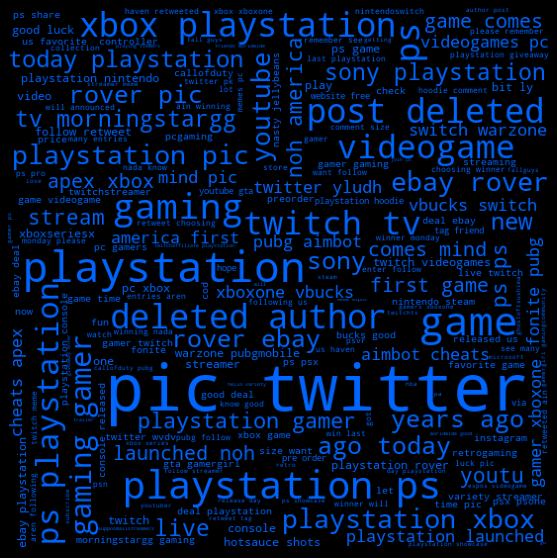

In [ ]:
# generate wordcloud
print('Generating word cloud....')
wc = WordCloud(background_color="black", max_words=200, width=400, height=400, #contour_width=3, contour_color='white',
mask=char_mask, random_state=1).generate(' '.join(date_1['cleaned_text']))

print('Making plot')
plt.figure(figsize=(20,10))
ypos = 800

plt.style.use('dark_background')
plt.imshow(wc.recolor(color_func=grey_color_func))

# use image colours with white background
#plt.imshow(wc.recolor(color_func=image_colors))

plt.axis("off")
plt.savefig('wordcloud_playstation_black_bkg.png', dpi=200)

In [ ]:
' '.join(date_1['tokenize_text'].apply(' '.join))

'thanks we should be live soon hope to see you there in the asylum of the allstars welcome gaming gamer twitch videogames pc xbox playstation nintendo steam streaming xboxaimbot com is the only website to get free hax fonite pubg aimbot cheats apex xbox playstation gamer xboxone vbucks switch warzone pubgmobile next gen always or in the past stas with the next gen game that blows you away the way it looks and plays don see reason to buy an maybe for that sweet cyberpunk unless you pc and getting upgrade instead xbox playstation cool fact about xbox series code name spec xbox series has tf gpu that is better than tf gcn gpu today thanks to rdna it also has cpu that is indeed faster than ps cpu say what you will but that has to annoy sony at least little bit xbox ps that xbox really look like this sony xbox com bjqgyzl cool fact about xbox series code name spec xbox series has tf gpu that is better than tf gcn gpu today thanks to rdna it also has cpu that is indeed faster than ps cpu say

In [ ]:
type(first)

pandas.core.series.Series

In [ ]:
one = xbox1[first]
two = xbox1[sec]
three = xbox1[third]

In [ ]:
print(len(one))
print(len(two))
print(len(three))

1979
1751
2127


In [ ]:
# one.describe()

In [ ]:
date_1 = one[['Post ID','Sound Bite Text']]
date_2 = two[['Post ID','Sound Bite Text']]
date_3 = three[['Post ID','Sound Bite Text']]

In [ ]:
# date_1

In [ ]:
import re

In [ ]:
def clean_text(text):
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text) # Remove URLs
  text = re.sub('@[^\s]+', '', text) # Remove usernames
  text = re.sub(r'#([^\s]+)', r'\1', text) # Remove the # in #hashtag
  text = re.sub(r'[^A-Za-z]+', ' ', text) # Remove special characters and numbers
  text = re.sub(r'rt|fb|nflx|goog|googl|axp|aapl', '', text, flags = re.I) # Remove tickers
  text = re.sub(r'\b[a-zA-Z]\b', '', text) # Remove "single-worders"
  text = re.sub(r' [ ]+', ' ', text) # Remove extra whitespaces
  text = text.lower() # Convert text to lower-case
  return text

In [ ]:
date_1['cleaned_text'] = date_1['Sound Bite Text'].apply(clean_text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
date_1['cleaned_text']

14        thanks we should be live soon hope to see you...
15       xboxaimbot com is the only website to get free...
16       next gen always or in the past stas with the n...
25        cool fact about xbox series code name spec xb...
26        that xbox really look like this sony xbox pic...
                               ...                        
19745    bark bark bark it time for farrstrider playz j...
19757    film the last conception staring nazaninmindi ...
19759     hotsauce shots for subs we re playing paladin...
19801    follow fark journey now in the third dimension...
19905     so there no vehicles in warzone at the moment...
Name: cleaned_text, Length: 1979, dtype: object

In [ ]:
import nltk
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopword_list = nltk.corpus.stopwords.words('english')

In [ ]:
a = ['pic', 'twitter', 'deleted', 'author', 'post', 'aaaa', 'bbbb']
tokens = [token for token in a if token not in cut_words]
' '.join([token for token in tokens if token not in stopword_list])

'aaaa bbbb'

In [ ]:
cut_words = ['pic', 'twitter', 'deleted', 'author', 'post'] 
tokens = [token for token in tokens if token not in cut_words]
def tokenize_and_stopwords(line):
  tokens = nltk.word_tokenize(line)   
  cut_words = ['pic', 'twitter', 'deleted', 'author', 'post'] 
  tokens = [token.strip() for token in tokens]
  tokens = [token for token in tokens if token not in cut_words]
  ' '.join([token for token in tokens if token not in stopword_list])
  return tokens

In [ ]:
date_1['tokenize_text'] = date_1['cleaned_text'].apply(tokenize_and_stopwords)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
date_1['tokenize_text']

14       [thanks, we, should, be, live, soon, hope, to,...
15       [xboxaimbot, com, is, the, only, website, to, ...
16       [next, gen, always, or, in, the, past, stas, w...
25       [cool, fact, about, xbox, series, code, name, ...
26       [that, xbox, really, look, like, this, sony, x...
                               ...                        
19745    [bark, bark, bark, it, time, for, farrstrider,...
19757    [film, the, last, conception, staring, nazanin...
19759    [hotsauce, shots, for, subs, we, re, playing, ...
19801    [follow, fark, journey, now, in, the, third, d...
19905    [so, there, no, vehicles, in, warzone, at, the...
Name: tokenize_text, Length: 1979, dtype: object

In [ ]:
date_1['cleaned_text']

14        thanks we should be live soon hope to see you...
15       xboxaimbot com is the only website to get free...
16       next gen always or in the past stas with the n...
25        cool fact about xbox series code name spec xb...
26        that xbox really look like this sony xbox pic...
                               ...                        
19745    bark bark bark it time for farrstrider playz j...
19757    film the last conception staring nazaninmindi ...
19759     hotsauce shots for subs we re playing paladin...
19801    follow fark journey now in the third dimension...
19905     so there no vehicles in warzone at the moment...
Name: cleaned_text, Length: 1979, dtype: object

In [ ]:
##--checar el typo
# print('Datetime type: %s' %type(xbox1['Publish_DateTime'].loc[0]))

In [ ]:
# x = pd.to_datetime(xbox1['Publish_DateTime'], infer_datetime_format=True)
# x

In [ ]:
# print(x.loc[20007])
# print(pd.DataFrame(x).dtypes.value_counts())
# get_dtype_counts() 

In [ ]:
# len(xbox1)
# xbox1.tail(10)

print(xbox1['Publish_DateTime'].loc[0])

In [ ]:
print(len(xbox1))
print(len(xbox1[:-8]))

20008
20000


In [ ]:
xbox1 = xbox1[:-8]

In [ ]:
# xbox1.tail()

In [ ]:
xbox1['Publish_DateTime'] = pd.to_datetime(xbox1['Publish_DateTime'], infer_datetime_format=True)

*  9-sept.	Xbox anuncia precios sugeridos
*  9-sept.	Xbox Gamepass anuncia alianza con EA play para sumar juegos a la subscripción
*  16-sept.	PS5 anuncia precios de consolas
*  21-sept.	MS compra Bethesada

In [ ]:
xbox1.drop(columns=xbox1.iloc[:,-16:].columns, inplace=True)

In [ ]:
first = (xbox1['Publish_DateTime'] >= '2020-09-7') & (xbox1['Publish_DateTime'] <= '2020-09-11')
sec = (xbox1['Publish_DateTime'] >= '2020-09-14') & (xbox1['Publish_DateTime'] <= '2020-09-18') 
third = (xbox1['Publish_DateTime'] >= '2020-09-19') & (xbox1['Publish_DateTime'] <= '2020-09-23')  

In [ ]:
xbox1.rename(columns={"Published Date (GMT+02:00) Windhoek": 'Publish_DateTime'}, inplace=True)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
##--------jalamos los 2 datasets de xbox------##

xbox1 = pd.read_excel('/content/drive/My Drive/proyecto_final/data/stream_01082409_xbox.xlsx')
# xbox2 = pd.read_excel('/content/drive/My Drive/proyecto_final/data/stream_01082409_xbox.gsheet')


In [ ]:
xbox1.dtypes


Post ID                                                object
Sound Bite Text                                        object
Ratings and Scores                                    float64
Title                                                 float64
Source Type                                            object
Post Type                                              object
Media Type                                             object
URL                                                    object
Media Link                                             object
Domain                                                 object
Sentiment                                              object
Publish_DateTime                               datetime64[ns]
Author Gender                                          object
Author URL                                             object
Author Name                                            object
Author Handle                                          object
Author I

In [ ]:
xbox1['Tags'].notna().any()

False